In [1]:
#!pip install yfinance

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
data=yf.download("AAPL",start="1950-01-01",end="2019-12-31")
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


In [5]:
data.shape

(9846, 6)

# Setting Data

In [42]:
shift =1

In [43]:
data=data["Close"].to_frame()
data

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


# Sliding Window

In [44]:
data[f"close in {shift} change"]=data["Close"].shift(-shift) #shift values in 'shift' rows upside. then we can predict if today value is some one, the what will be the value after 10 days

In [45]:
data.head()

,Close,close in 1 change
Date,,
1980-12-12,0.128348,0.121652
1980-12-15,0.121652,0.112723
1980-12-16,0.112723,0.115513
1980-12-17,0.115513,0.118862
1980-12-18,0.118862,0.126116


In [46]:
data.tail(15)

,Close,close in 1 change
Date,,
2019-12-09,66.730003,67.120003
2019-12-10,67.120003,67.692497
2019-12-11,67.692497,67.864998
2019-12-12,67.864998,68.787498
2019-12-13,68.787498,69.964996
2019-12-16,69.964996,70.102501
2019-12-17,70.102501,69.934998
2019-12-18,69.934998,70.004997
2019-12-19,70.004997,69.860001


In [47]:
data_c=data.iloc[:-shift,:]

In [48]:
data_c.tail()

,Close,close in 1 change
Date,,
2019-12-20,69.860001,71.000000
2019-12-23,71.000000,71.067497
2019-12-24,71.067497,72.477501
2019-12-26,72.477501,72.449997
2019-12-27,72.449997,72.879997


In [49]:
data_c.reset_index(inplace=True)

In [50]:
data_c.head()

,Date,Close,close in 1 change
0,1980-12-12,0.128348,0.121652
1,1980-12-15,0.121652,0.112723
2,1980-12-16,0.112723,0.115513
3,1980-12-17,0.115513,0.118862
4,1980-12-18,0.118862,0.126116


when you got 7.643214 as current value. after 10 days , the model predict 7.680000

In [51]:
data_c.tail()

,Date,Close,close in 1 change
9840,2019-12-20,69.860001,71.000000
9841,2019-12-23,71.000000,71.067497
9842,2019-12-24,71.067497,72.477501
9843,2019-12-26,72.477501,72.449997
9844,2019-12-27,72.449997,72.879997


In [52]:
data_c.drop("Date",axis=1,inplace=True)
data_c.head()

<ipython-input-52-f9a0f97f34a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c.drop("Date",axis=1,inplace=True)


,Close,close in 1 change
0,0.128348,0.121652
1,0.121652,0.112723
2,0.112723,0.115513
3,0.115513,0.118862
4,0.118862,0.126116


# Machine Learning

In [53]:
x=data_c.iloc[:,0].values.reshape(data_c.shape[0],1)
y=data_c.iloc[:,1].values

In [54]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [55]:
#random forest
rf=RandomForestRegressor(n_estimators=500)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.2870314690125336

In [56]:

#Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))


0.2393798080158871

In [64]:
from sklearn.model_selection import GridSearchCV, KFold
# # Hyperparameter Tuning

param_grid={'n_estimators':[50,100,200,500,1000]}
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
grid_search=GridSearchCV(rf,param_grid,cv=kfold)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
grid_search.best_score_



{'n_estimators': 200}


0.9995319610940516

In [65]:
#random forest
rf=RandomForestRegressor(n_estimators=200)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.28809391604075796

## Therefore the best model is linear regression model

# Forcasting

In [66]:
y_act_shift=data_c.iloc[-500:,:][f"close in {shift} change"].values
y_act_shift


array([43.25749969, 43.75      , 43.58750153, 43.58250046, 43.57249832,
       43.81999969, 44.27249908, 44.04750061, 44.77500153, 44.81499863,
       44.61500168, 44.25      , 44.25999832, 43.55500031, 42.77750015,
       42.87749863, 41.99000168, 41.74250031, 41.85749817, 41.94499969,
       40.125     , 39.12250137, 40.75749969, 39.88499832, 38.78749847,
       39.10250092, 40.67750168, 41.08499908, 41.84249878, 43.24750137,
       43.10749817, 42.96250153, 42.76750183, 43.125     , 43.875     ,
       44.74250031, 44.59749985, 44.52999878, 43.75      , 44.05250168,
       44.20500183, 44.16749954, 43.75749969, 44.23500061, 44.99499893,
       45.43000031, 44.99250031, 44.61000061, 44.66249847, 44.50500107,
       43.82500076, 43.81000137, 42.81750107, 42.21250153, 41.23500061,
       43.19250107, 42.08499908, 41.61999893, 41.94499969, 41.66999817,
       42.09749985, 42.90250015, 43.20000076, 42.09500122, 42.51250076,
       43.3125    , 43.11000061, 43.53499985, 43.68249893, 43.95

In [71]:
#predict using Linear regression
y_pred_shift=lr.predict(data_c.iloc[-500:,:]["Close"].values.reshape(500,1))
y_pred_shift

array([43.09674343, 43.29692547, 43.78987217, 43.62722641, 43.62222081,
       43.6122096 , 43.85993531, 44.31284484, 44.08764243, 44.81580274,
       44.85583609, 44.65565787, 44.29032536, 44.30033274, 43.59469573,
       42.81649086, 42.91657997, 42.02827861, 41.78055291, 41.895655  ,
       41.98323584, 40.16158653, 39.15817925, 40.79465951, 39.92136732,
       38.82287271, 39.13816067, 40.71458899, 41.12245574, 41.88064202,
       43.28691808, 43.14678798, 43.00165992, 42.80648348, 43.16430568,
       43.91498547, 44.78327206, 44.63814018, 44.57057793, 43.78987217,
       44.09264803, 44.24528641, 44.20775012, 43.79737866, 44.27531237,
       45.03599955, 45.4713952 , 45.03349865, 44.65065227, 44.70319772,
       44.54555756, 43.86494091, 43.84992793, 42.85652803, 42.25098013,
       41.27259322, 43.23186793, 42.12336212, 41.6579405 , 41.98323584,
       41.70798506, 42.13587422, 42.94160416, 43.23937442, 42.13337333,
       42.55125128, 43.35197563, 43.14929269, 43.57467714, 43.72

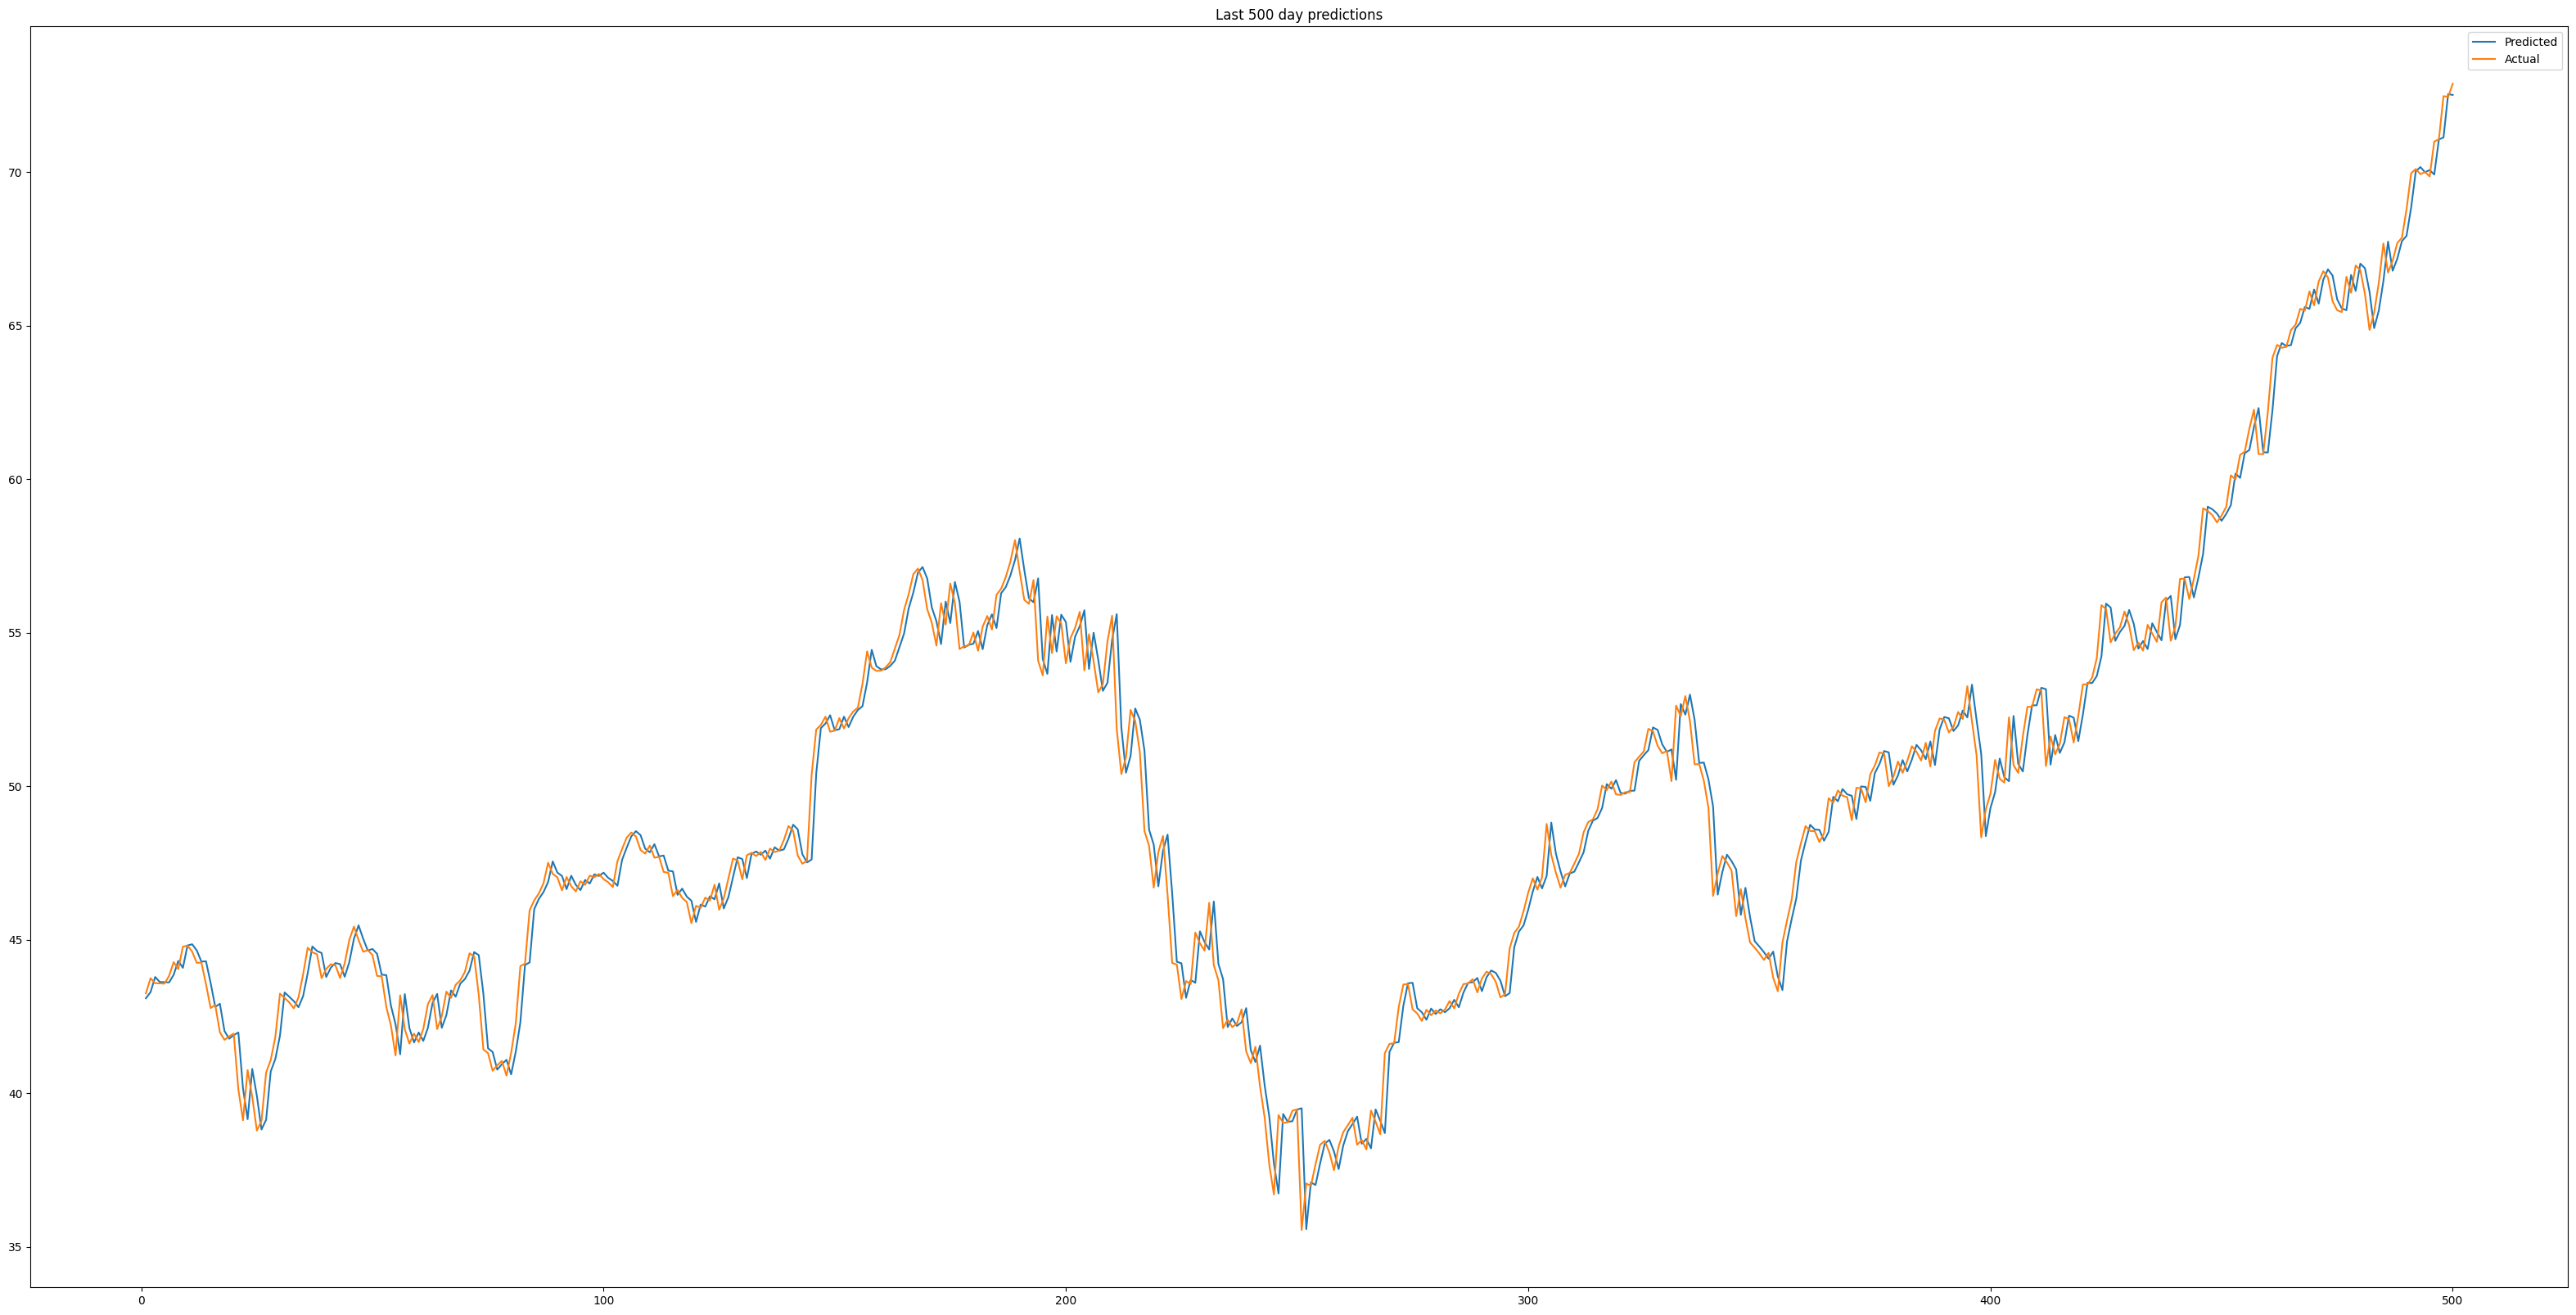

In [72]:
plt.figure(figsize=(40,20))
plt.plot(range(1,501),y_pred_shift)
plt.plot(range(1,501),y_act_shift)
plt.legend(["Predicted","Actual"])
plt.title("Last 500 day predictions")
plt.show()

In [73]:
#predict using randomforest model
y_pred_shift=rf.predict(data_c.iloc[-500:,:]["Close"].values.reshape(500,1))
y_pred_shift

array([43.27555603, 43.43817442, 43.80515357, 43.66689402, 43.6909834 ,
       43.70139526, 44.09371235, 43.98847527, 44.48497618, 44.73682402,
       44.66635065, 44.4924748 , 44.18396137, 43.81663734, 43.13820861,
       42.5802113 , 42.4022262 , 41.48414231, 41.98391134, 42.2110001 ,
       41.10016917, 39.43186287, 40.17791879, 40.41737383, 39.07266138,
       38.90885025, 39.99914487, 40.9562995 , 41.38236231, 42.81579316,
       43.24954853, 43.18632309, 42.77942488, 42.9461248 , 43.56070213,
       44.41015057, 44.70579939, 44.48856165, 43.84420023, 43.80515357,
       44.48160116, 44.2689995 , 43.77921236, 44.06383465, 44.67196163,
       45.14648787, 45.27227486, 44.81848799, 44.5434367 , 44.86632612,
       43.77802555, 43.95895081, 44.07378736, 42.49897562, 41.77493472,
       42.39541344, 42.14173685, 41.92372459, 41.974625  , 41.10016917,
       42.26046238, 42.67593781, 42.91124849, 41.87381233, 42.51018806,
       43.04731241, 43.58718792, 43.39814747, 43.55617044, 43.45

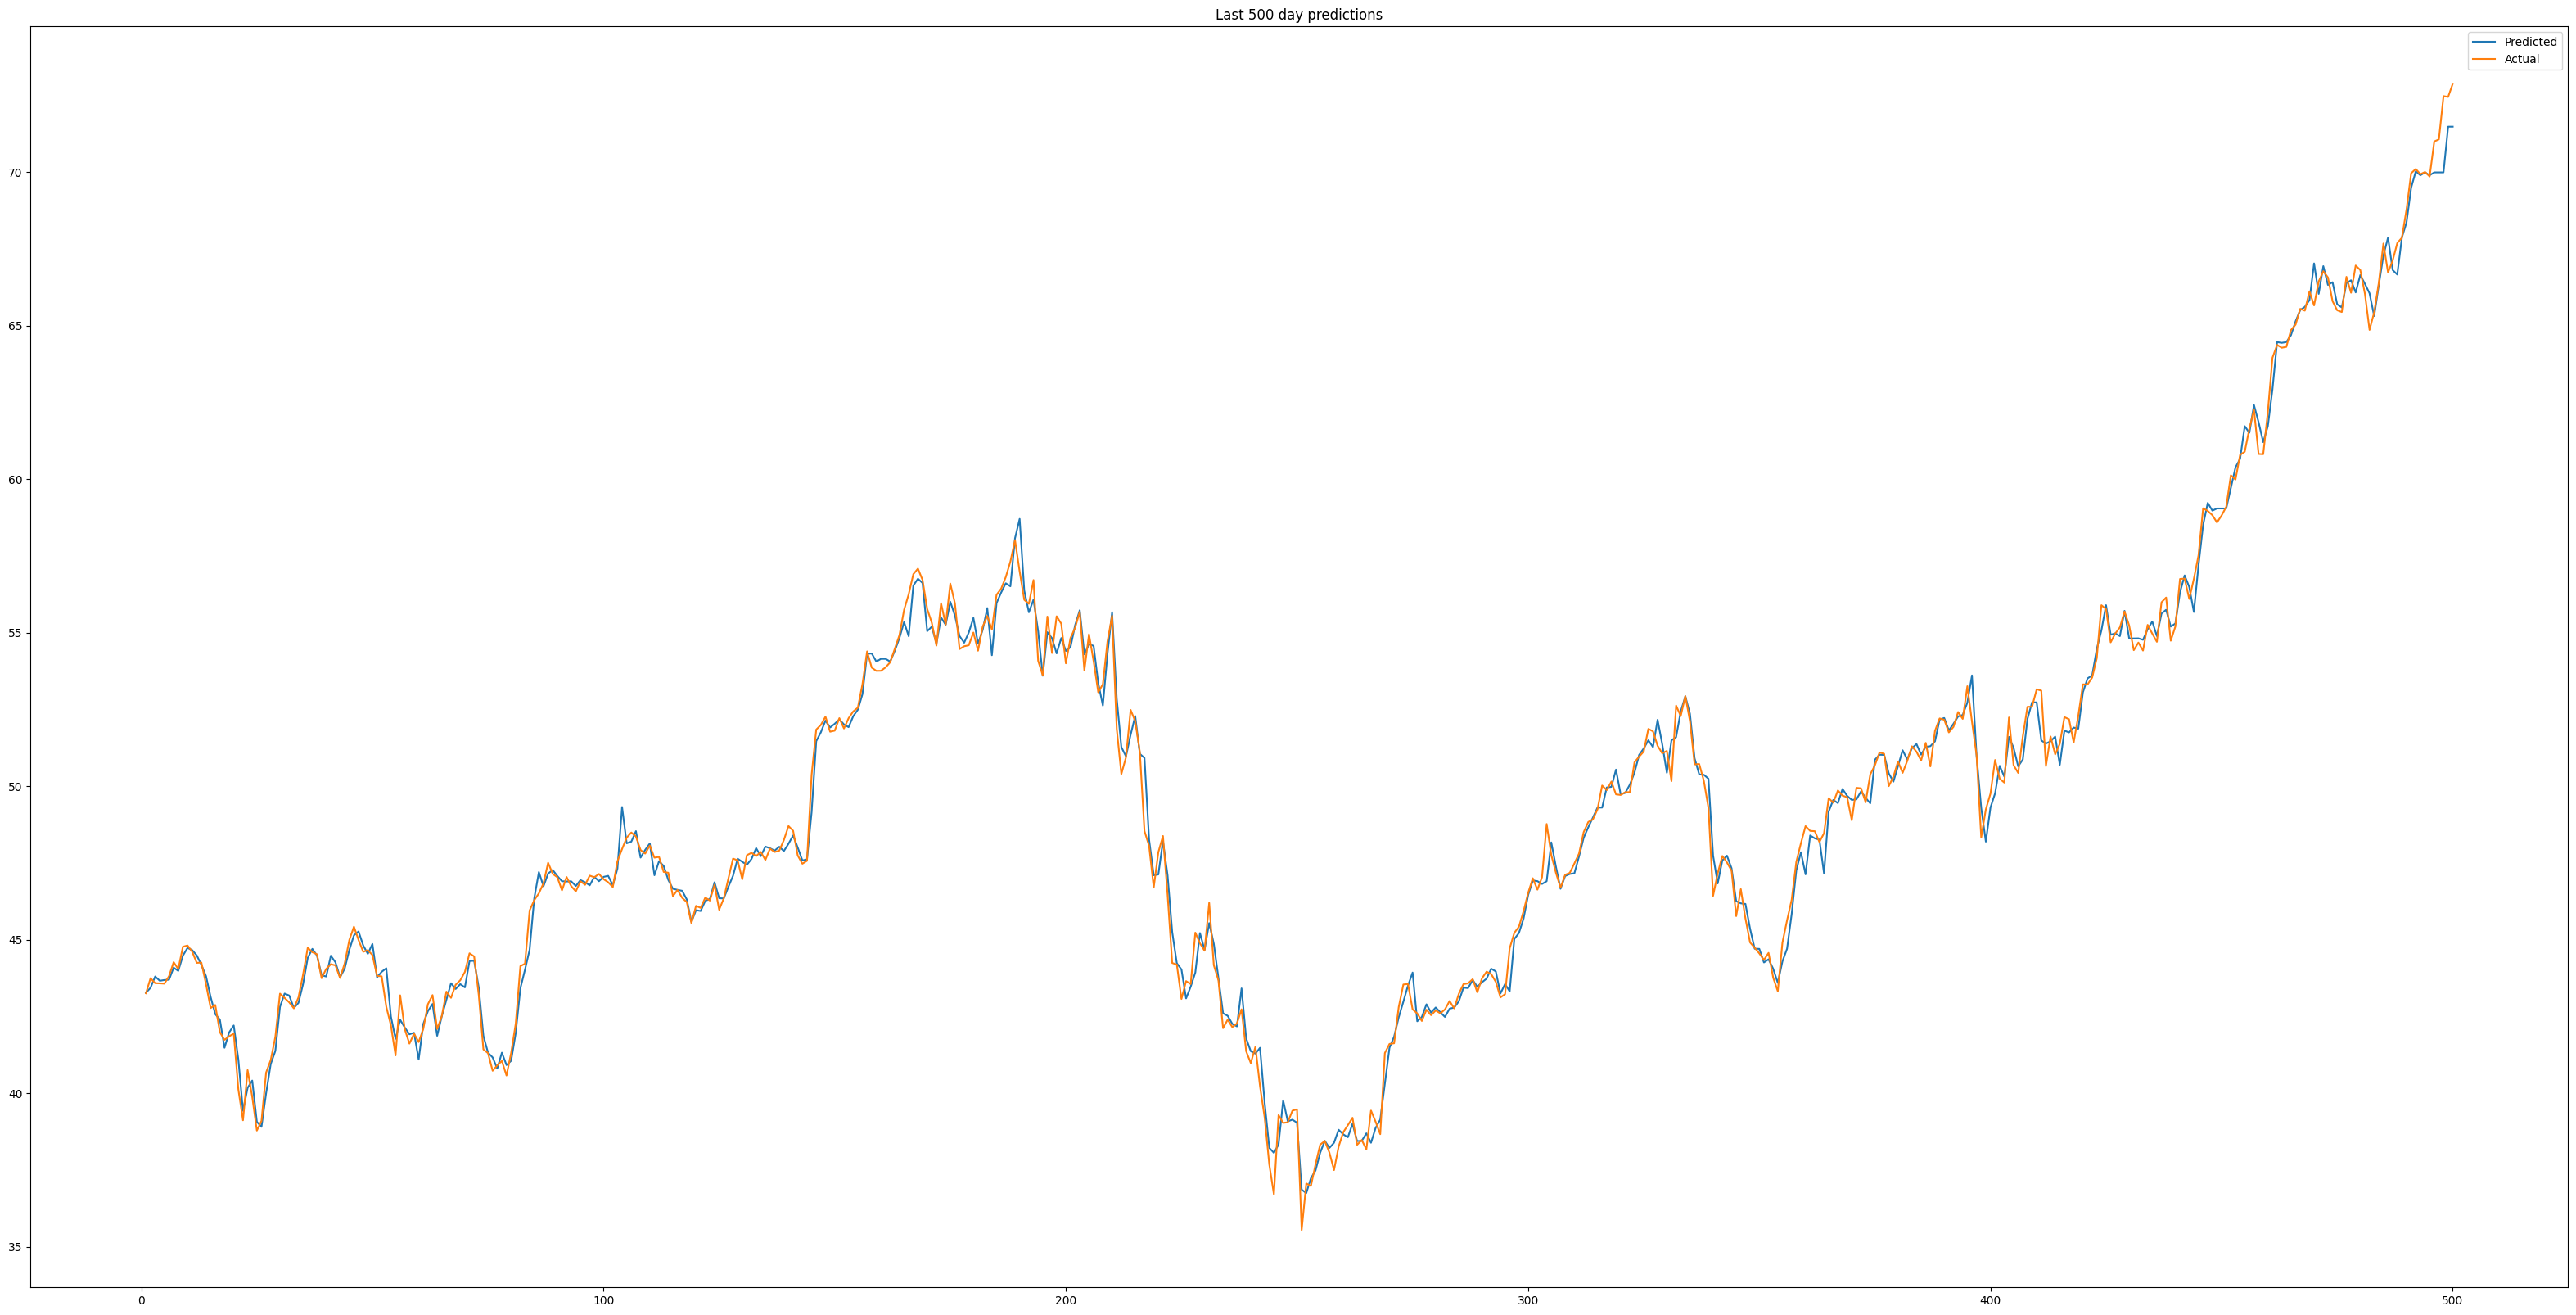

In [74]:
plt.figure(figsize=(40,20))
plt.plot(range(1,501),y_pred_shift)
plt.plot(range(1,501),y_act_shift)
plt.legend(["Predicted","Actual"])
plt.title("Last 500 day predictions")
plt.show()